# **Email Fraud Detection**

---

# 1. Introduction

This project aims to detect fraudulent emails by applying machine learning algorithms on the **SpamAssassin** dataset. Using three different algorithms: **Multinomial Naive Bayes**, **Random Forest**, and **Support Vector Machines**, evaluating different strategies to classify emails as spam or not spam.

The models are assessed using metrics such as **accuracy**, **precision**, **recall**, **F1-score** and **support** to identify the most effective classification approach.

# 2. Dataset Overview

The SpamAssassin dataset contains emails that are classified as **spam** (fraudulent) or **ham** (legitimate). The dataset is split across three sections:
- **Easy Ham** (emails that are easily classified as ham)
- **Hard Ham** (emails that are harder to classify as ham)
- **Spam** (emails classified as spam)

Dataset Breakdown:
1. Easy Ham: **2,551** total emails
2. Hard Ham: **250** total emails
3. Spam: **1,378** total emails

The dataset available online contains **4,179** email messages which are represented as text files. The email header fileds are:
- **From:** The sender's email address.
- **Date:** The date of delivery.
- **Delivered-To:** The recipient's email address.
- **Received:** The series of servers that handled the email during delivery.
- **Message-ID:** A unique identifier for the email message.
- **Subject:** The subject of the email.
- **Body:** The main content of the email message (sometimes includes additional metadata or body text).

# 3. Data Collection


Three csv files containing the relevant email headings:
- **Subject**
- **From**
- **To**
- **Date**
- **Body**

In [ ]:
# Importing necessary Libraries

# Core Libraries
import pandas as pd
import numpy as np
import csv
import re
import string

# Text Processing Libraries
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Feature Extraction and Model Evaluation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Machine Learning Models
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Others
from collections import Counter

# 4. Data Preprocessing

**Preprocessing Pipeline**:

- Cleaning the text
- Tokenization
- Stopword removal
- Stemming

The pipeline is applied to the **body of each email**, transforming the data into a processed format suitable for feature extraction.

In [ ]:
# Download specific resources from the Natural Language Toolkit (NLTK) that are essential for text processing
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

# The main function that will call all other text processing functions to preprocess the email bodies
def preprocess_email_body(body):

    # Step 1: Clean the text (remove unwanted characters)
    body_cleaned = clean_text(body)

    # Step 2: Tokenization
    tokens = tokenize_text(body_cleaned)

    # Step 3: Convert tokens to lowercase
    tokens_lower = [token.lower() for token in tokens]

    # Step 4: Remove stop words
    tokens_no_stopwords = remove_stopwords(tokens_lower)

    # Step 5: Apply stemming or lemmatization
    tokens_stemmed = stem_tokens(tokens_no_stopwords)

    return tokens_stemmed

def clean_text(text):

    text = re.sub(r'<.*?>', ' ', text)
    text = text.replace('nbsp', ' ') 
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Tokenize the cleaned text into words
def tokenize_text(text):

    return word_tokenize(text)

# Remove stop words from the tokenized text
def remove_stopwords(tokens):

    stop_words = set(stopwords.words('english'))
    return [token for token in tokens if token not in stop_words]

# Apply stemming to the tokens
def stem_tokens(tokens):

    stemmer = PorterStemmer()

    # Stemming
    return [stemmer.stem(token) for token in tokens]

# Read the available CSV files into separate DataFrames
df_easy_ham = pd.read_csv('easy_ham.csv')
df_hard_ham = pd.read_csv('hard_ham.csv')
df_spam = pd.read_csv('spam.csv')

# Preprocess the body of each email in the "Body" column
df_easy_ham['processed_body'] = df_easy_ham['Body'].apply(preprocess_email_body)
df_hard_ham['processed_body'] = df_hard_ham['Body'].apply(preprocess_email_body)
df_spam['processed_body'] = df_spam['Body'].apply(preprocess_email_body)

print(df_easy_ham['processed_body'][0])
print(df_hard_ham['processed_body'][0])
print(df_spam['processed_body'][0])

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['date', 'wed', 'aug', 'chri', 'garrigu', 'messageid', 'cant', 'reproduc', 'error', 'repeat', 'like', 'everi', 'time', 'without', 'fail', 'debug', 'log', 'pick', 'happen', 'pickit', 'exec', 'pick', 'inbox', 'list', 'lbrace', 'lbrace', 'subject', 'ftp', 'rbrace', 'rbrace', 'sequenc', 'mercuri', 'exec', 'pick', 'inbox', 'list', 'lbrace', 'lbrace', 'subject', 'ftp', 'rbrace', 'rbrace', 'sequenc', 'mercuri', 'ftocpickmsg', 'hit', 'mark', 'hit', 'tkerror', 'syntax', 'error', 'express', 'int', 'note', 'run', 'pick', 'command', 'hand', 'delta', 'pick', 'inbox', 'list', 'lbrace', 'lbrace', 'subject', 'ftp', 'rbrace', 'rbrace', 'sequenc', 'mercuri', 'hit', 'that', 'hit', 'come', 'obvious', 'version', 'nmh', 'im', 'use', 'delta', 'pick', 'version', 'pick', 'nmh', 'compil', 'fuchsiacsmuozau', 'sun', 'mar', 'ict', 'relev', 'part', 'mhprofil', 'delta', 'mhparam', 'pick', 'seq', 'sel', 'list', 'sinc', 'pick', 'command', 'work', 'sequenc', 'actual', 'one', 'that', 'explicit', 'command', 'line', 'sear

Three dataframes,
- **df_easy_ham**
- **df_hard_ham**
- **df_spam**

have an extra column called **preprocessed_body**.
This column contains tokens that are standardised to their base form.

In [ ]:
print(df_easy_ham['processed_body'].isnull().sum())
print(df_hard_ham['processed_body'].isnull().sum())
print(df_spam['processed_body'].isnull().sum())

0
0
0


# 5. Exploratory Data Analysis (EDA)

Adding a **label** cloumn.

Emails in **df_easy_ham** and **df_hard_ham** are labeled as **ham** (legitimate emails).

Emails in **df_spam** are labeled as **spam** (fraudulent emails).

In [ ]:
# Add the 'label' column to each DataFrame
df_easy_ham['label'] = 'ham'
df_hard_ham['label'] = 'ham'
df_spam['label'] = 'spam'

df_combined = pd.concat([df_easy_ham, df_hard_ham, df_spam], ignore_index=True)
df_combined['processed_body'] = df_combined['processed_body'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))

print(df_combined.head())

                                 Subject  \
0               Re: New Sequences Window   
1              [zzzzteana] RE: Alexander   
2              [zzzzteana] Moscow bomber   
3  [IRR] Klez: The Virus That  Won't Die   
4                   Re: Insert signature   

                                        From  \
0             Robert Elz <kre@munnari.OZ.AU>   
1  Steve Burt <Steve_Burt@cursor-system.com>   
2                Tim Chapman <timc@2ubh.com>   
3           Monty Solomon <monty@roscom.com>   
4       Tony Nugent <tony@linuxworks.com.au>   

                                                  To  \
0  Chris Garrigues <cwg-dated-1030377287.06fa6d@D...   
1  "'zzzzteana@yahoogroups.com'" <zzzzteana@yahoo...   
2              zzzzteana <zzzzteana@yahoogroups.com>   
3                            undisclosed-recipient:;   
4   Exmh Users Mailing List <exmh-users@example.com>   

                              Date  \
0  Thu, 22 Aug 2002 18:26:25 +0700   
1  Thu, 22 Aug 2002 12:46:18 +010

Lets look at the distribution of the classes: **ham** vs **spam**.

In [ ]:
label_counts = df_combined['label'].value_counts()
print("\nLabel Distribution:\n", label_counts)


Label Distribution:
 label
ham     2801
spam    1378
Name: count, dtype: int64


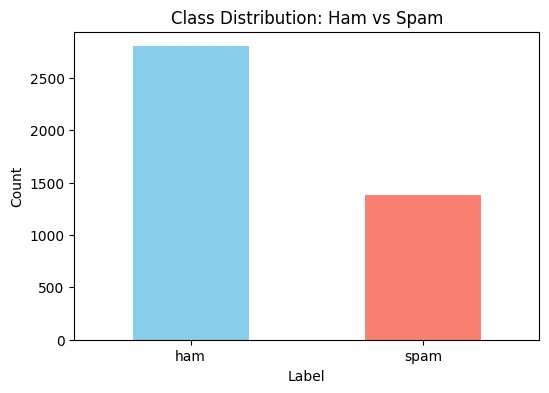

In [ ]:
plt.figure(figsize=(6, 4))
df_combined['label'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution: Ham vs Spam')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Distribution of **email lengths** using a histogram. Email length is based on number of **individual tokens** in the email's processed_body entry.

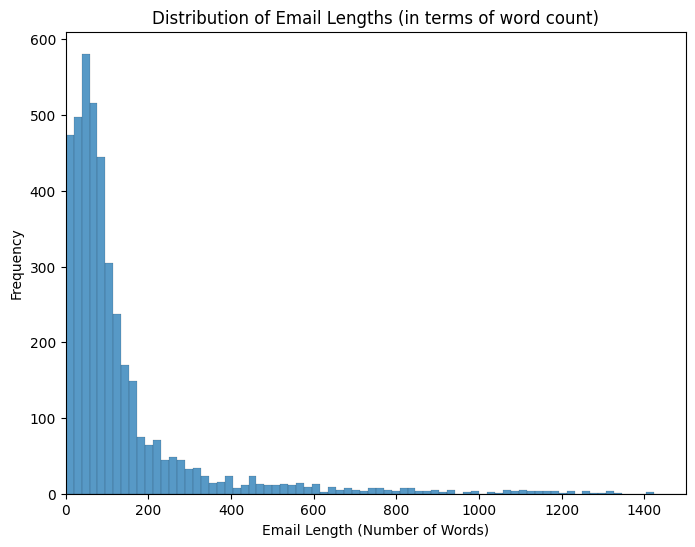

In [ ]:
# Add a new column 'email_length' that stores the number of words (tokens) in each email body
df_combined['email_length'] = df_combined['processed_body'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8, 6))
sns.histplot(df_combined['email_length'], bins=500)
plt.xlim(0, 1500)
plt.title('Distribution of Email Lengths (in terms of word count)')
plt.xlabel('Email Length (Number of Words)')
plt.ylabel('Frequency')
plt.show()


Top 15 most common words in df_combined

In [ ]:
stop_words = set(stopwords.words('english'))
all_words = ' '.join(df_combined['processed_body']).split()
filtered_words = [word for word in all_words if word not in stop_words]

# Get the top N most common words
word_counts = Counter(filtered_words)
top_n_words = word_counts.most_common(15)

print("\nTop 20 most frequent words:\n", top_n_words)


Top 20 most frequent words:
 [('email', 4692), ('use', 3841), ('get', 3328), ('list', 3152), ('one', 2831), ('free', 2688), ('mail', 2517), ('time', 2482), ('new', 2324), ('make', 2164), ('work', 2089), ('like', 2081), ('us', 2026), ('click', 1930), ('peopl', 1929)]


<BarContainer object of 15 artists>

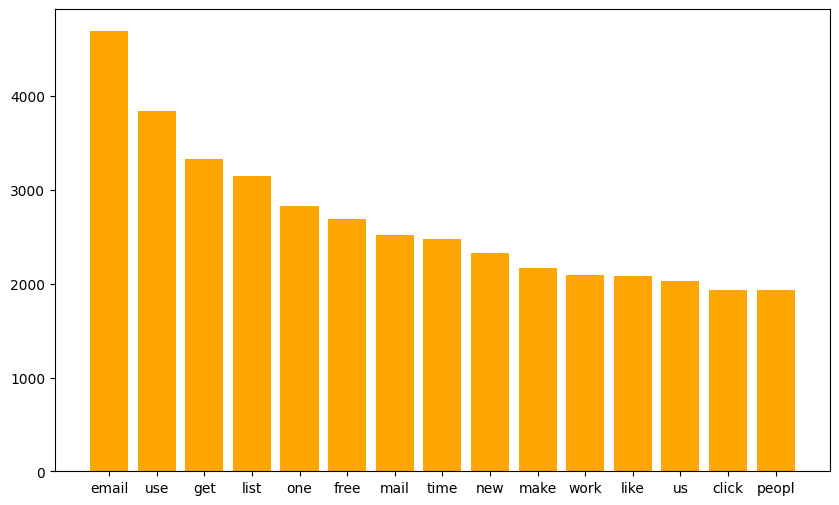

In [ ]:
words, counts = zip(*top_n_words)
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='orange')


## WordCloud of Most Frequent Words in Emails:

A WordCloud is generated to visually represent the **most frequent words/tokens** in the emails.

A WordCloud is a popular way to display text data where the **size** of each word corresponds to its **frequency**. Words that appear more often are displayed in larger font size.

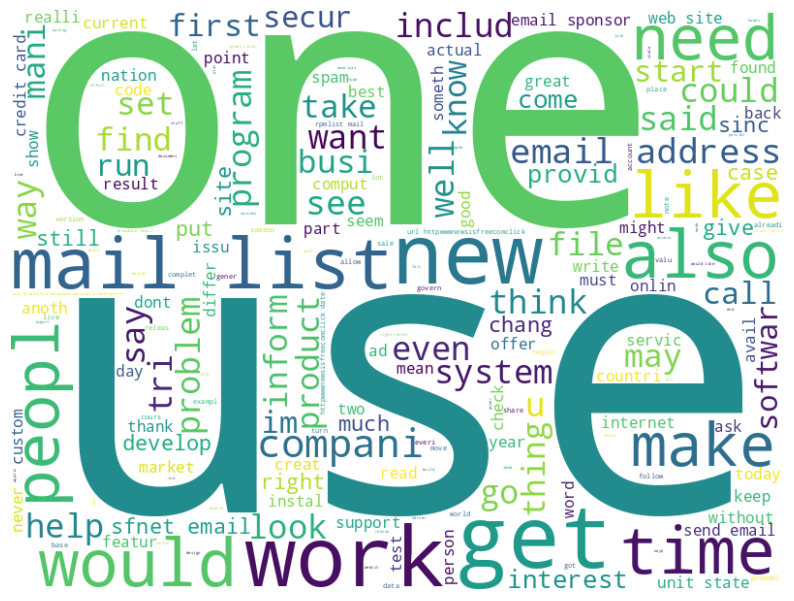

In [ ]:
# Combine all processed email text into a single string
all_text = ' '.join(df_combined['processed_body'])

# Generate the WordCloud
wordcloud = WordCloud(
    stopwords=stop_words,
    background_color='white',
    width=800,
    height=600,
    max_words=200
).generate(all_text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# 6. Feature Extraction

Performing feature extraction using the **TF-IDF (Term Frequency-Inverse Document Frequency)** technique, which transforms the **textual email data** into **numerical features** that can be used by our machine learning models.

- **max_features=5000:** This limits the number of features (words or n-grams) to the top 5000 most important features based on the TF-IDF score, reducing the dimensionality of feature space and focusing on most impoertant features.

- **ngram_range=(1, 2):** This allows the vectorizer to capture both unigrams (single words) and bigrams (pairs of consecutive words).

In [ ]:
processed_bodies = df_combined['processed_body']

tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_tfidf = tfidf_vectorizer.fit_transform(processed_bodies)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_feature_names)
tfidf_df['label'] = df_combined['label'].values
print(tfidf_df.describe())

            abacha      abandon         abil          abl      absolut  \
count  4179.000000  4179.000000  4179.000000  4179.000000  4179.000000   
mean      0.000872     0.000493     0.001969     0.003530     0.002473   
std       0.018576     0.007881     0.012797     0.016824     0.015100   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       0.480812     0.286398     0.263058     0.204920     0.295447   

       absolut free       absorb         abus  abus control           ac  ...  \
count   4179.000000  4179.000000  4179.000000   4179.000000  4179.000000  ...   
mean       0.000630     0.000437     0.001323      0.000979     0.001104  ...   
std        0.009371     0.008607     0.012480      0.011918     0.015034  ...   
min      

**TF-IDF DataFrame:**

- **Sparse Features:** Most features have low values across the dataset, which indicates a sparse matrix where many words/bigrams have little to no contribution in each email.

- The **standard deviation (std)** values vary significantly across features, with some features having a higher std. Features like "abacha" and "zdnet" have a relatively high standard deviation.

- The **low standard deviation** features are likely to be less informative, as they appear consistently in most emails with similar TF-IDF scores. For example, common words that are neutral across both classes might have very low variation, making them less useful for distinguishing the two classes.

- Many words or bigrams appear in very few emails, and the ones that do appear, appear **rarely**. This reinforces the idea that the feature space is **sparse**.

## **Sparsity** and **Density** of the TF-IDF matrix:

- **Sparsity** is defined as the fraction of zero entries in the matrix.
- **Density** is the fraction of non-zero entries in the matrix.

In [ ]:
# Calculate sparsity and density
num_non_zero_elements = X_tfidf.nnz  
num_total_elements = X_tfidf.shape[0] * X_tfidf.shape[1] 
sparsity = 1 - (num_non_zero_elements / num_total_elements)  
density = num_non_zero_elements / num_total_elements 

print(f"Sparsity: {sparsity:.4f}")
print(f"Density: {density:.4f}")

Sparsity: 0.9816
Density: 0.0184


# 7. Model Training & Evaluation

Classify the emails as either "spam" or "ham", based on the features extracted from the processed text (using ML):

- **Binary Variables:** 'spam' is encoded as 1, and 'ham' is encoded as 0.

- **Data Splits:** 20% of the data will be used for testing, and 80% will be used for training.

- **random_state=42:** Ensures that the split is reproducible (the same random split is generated every time the code runs).

In [ ]:
# Split features (X) and labels (y)
X = tfidf_df.drop('label', axis=1)  
y = tfidf_df['label'].apply(lambda x: 1 if x == 'spam' else 0)  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 7.1 MultiNomial Naive Bayes

**Multinomial Naive Bayes** is a probabilistic classifier that is based on **Bayes' Theorem**. It assumes that the features (word counts or word frequencies in this case) are conditionally independent given the class.

In [ ]:
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9784688995215312
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       589
           1       0.97      0.96      0.96       247

    accuracy                           0.98       836
   macro avg       0.98      0.97      0.97       836
weighted avg       0.98      0.98      0.98       836



## 7.2 Random Forest

**Random Forests** are an ensemble learning method that combine **multiple decision trees** to improve predictive performance.

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100) # 100 decision trees that will be built in the ensemble
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Accuracy: 0.9796650717703349
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       589
           1       0.96      0.98      0.97       247

    accuracy                           0.98       836
   macro avg       0.97      0.98      0.98       836
weighted avg       0.98      0.98      0.98       836



## 7.3 Support Vector Machine

SVM's are powerful classifiers, especially for high-dimensional data, and work by finding the **optimal boundary** (just a line in the 2D-plane) that best **separates different classes** in the dataset.

In [ ]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

Accuracy: 0.9820574162679426
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       589
           1       0.98      0.96      0.97       247

    accuracy                           0.98       836
   macro avg       0.98      0.98      0.98       836
weighted avg       0.98      0.98      0.98       836



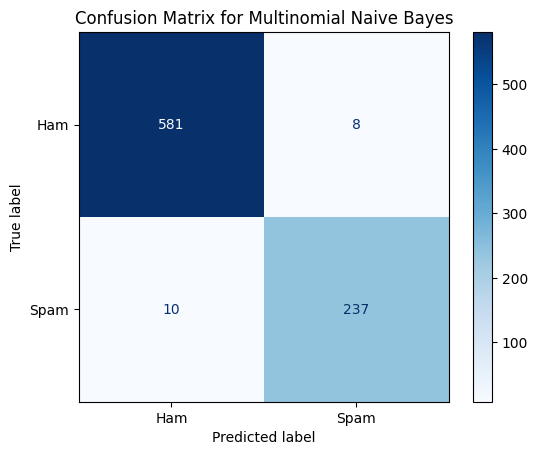

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ham', 'Spam'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix for Multinomial Naive Bayes')
plt.show()

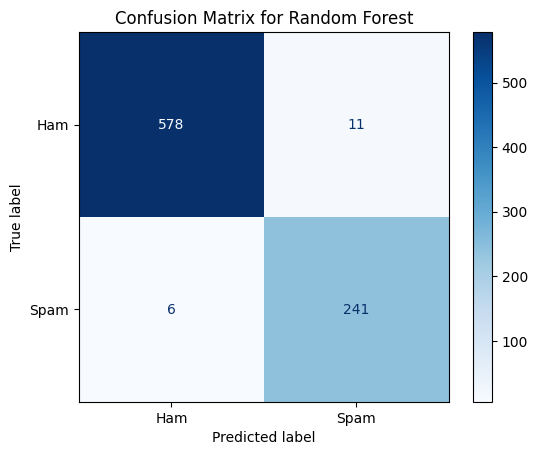

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['Ham', 'Spam'])
disp_rf.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix for Random Forest')
plt.show()

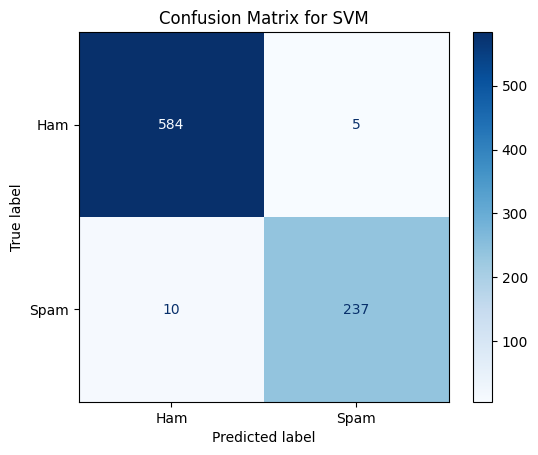

In [ ]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=['Ham', 'Spam'])
disp_svm.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix for SVM')
plt.show()

## Confusion Matrix Interpretation

- **True Positives (TP):** The number of spam emails correctly classified as spam.

- **True Negatives (TN):** The number of ham emails correctly classified as ham.

- **False Positives (FP):** The number of ham emails incorrectly classified as spam.

- **False Negatives (FN):** The number of spam emails incorrectly classified as ham.

The confusion matrix helps assess the performance of the classification algorithm by showing these values.

# 8. Results & Conclusions

## Evaluation Metrics:

- **Accuracy:** The proportion of correct predictions (both true positives and true negatives) out of all predictions made.

    - Accuracy = (True Positives + True Negatives) / Total Predictions

    - **Best Model:** SVM with 98.21% accuracy, meaning it made the correct prediction 98.21% of the time, which is slightly higher than the other two models.

- **Precision:** The proportion of true positive predictions out of all instances predicted as positive.

    - Precision = True Positives / (True Positives + True Negatives)

    - **Best Model:**
SVM with 0.98 precision for both ham and spam. This means that when the model predicted an email as either ham or spam, it was 98% correct in its prediction.

- **Recall:** The proportion of true positive predictions out of all actual positive instances.

    - Recall = True Positives / (True Positives + False Negatives)

    - **Best Model:**
SVM with 0.99 recall for ham and 0.96 recall for spam. This means that SVM was able to identify 99% of ham emails and 96% of spam emails.

- **F1-Score:** The F1-score gives a balance between precision and recall. It is useful when we need a single metric to evaluate model performance, especially in cases of class imbalance.

    - F1-Score = 2 x (Precision x Recall)/(Precision + Recall)
  
    - **Best Model:**
SVM with 0.99 F1-score for ham and 0.97 F1-score for spam, indicating excellent balance between precision and recall for both classes.

- **Support:** The number of actual occurrences of each class in the dataset.

Support values simply reflect the **distribution of data** and do not indicate model performance. The support for both ham and spam is roughly balanced, with slightly more ham emails.

**Support Vector Machine (SVM)** is the best-performing model across all evaluation metrics. It slightly outperforms both the Multinomial Naive Bayes and Random Forest models in identifying both ham and spam emails.